## 3.6.1 Credit Card Fraud
I am going to use a data set to try and predict credit card fraud

In [97]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [98]:
#load the data
data = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\3.6.1 data\creditcard.csv')

In [99]:
#lets take a look 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


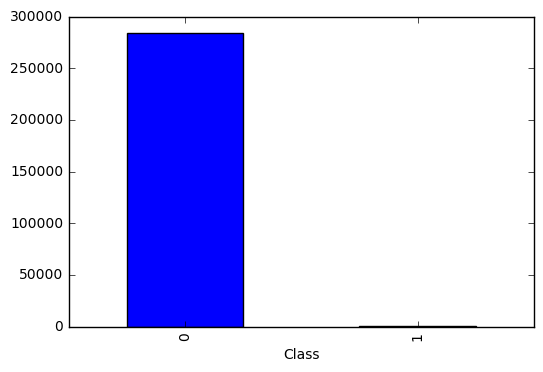

In [101]:
#reading the meta data and taking a look, we can see that there are a bunch of pre-prepped columns they can not disclose due 
#to confidentiality as well as time since the first transaction, which is likely useless, and amount. Amount is the only column
#not normalized around 0. so lets normalize it and then look at the count 
data['Amount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop('Time', axis=1)
data['Class'].groupby(df['Class']).count().plot(kind='bar')

In [102]:
#as we can see, there is a huge class imbalance so we are going to need to redefine the training set other wise our model will
#just ignore the existance of fraud and get over a 99% success rate. This will not identify fraud at all
X = data.drop('Class',axis=1)
y = data['Class']

In [147]:
# Number of fraud
number_of_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = data[data.Class == 0].index

# lets randomly select non fraud columns with the same length
random_normal_indices = np.random.choice(normal_indices, number_of_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# adding them together
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
new_data = data.iloc[under_sample_indices,:]

X_undersample = new_data.iloc[:, new_data.columns != 'Class']
y_undersample = new_data.iloc[:, new_data.columns == 'Class']

# lets check to make sure we did this right
print('total number of fraud transactions:', number_of_fraud)
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

total number of fraud transactions: 492
Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [148]:
#train test split for both the whole set and the sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_undersample,y_undersample,test_size = 0.25, random_state = 0)
y_train2 = y_train2['Class'].values
y_test2 = y_test2['Class'].values

In [149]:
#lets test regression on the whole set
lr = LogisticRegression(penalty='l1')
# Fit the model.
fit = lr.fit(X_train, y_train)

pred_y_sklearn = lr.predict(X_train)
crosstab = pd.crosstab(pred_y_sklearn, y_train)
print('C=', c)
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted non-fraud percentage')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted fraud percentage')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(lr.score(X_train, y_train))
print(lr.score(X_train, y_train))
print()

C= 1000
Actual on top and predicted on left
Class       0    1
row_0             
0      213201  144
1          32  228
accurately predicted non-fraud percentage
0.99984992942
accurately predicted fraud percentage
0.612903225806
Percentage accuracy
0.99917604925
0.99917604925



In [150]:
#as expected almost 100% accuracy with a terrible fraud percentage. lets use the small set
lr = LogisticRegression(penalty='l1')
fit = lr.fit(X_train2, y_train2)
pred_y_sklearn = lr.predict(X_train2)
crosstab = pd.crosstab(pred_y_sklearn, y_train2)
print('small train prediction')
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted non-fraud percentage')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted fraud percentage')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(lr.score(X_train2, y_train2))
print(lr.score(X_train2, y_train2))
print()

small train prediction
Actual on top and predicted on left
col_0    0    1
row_0          
0      358   25
1        7  348
accurately predicted non-fraud percentage
0.980821917808
accurately predicted fraud percentage
0.932975871314
Percentage accuracy
0.956639566396
0.956639566396



In [151]:
#this is way better but lets test to see what the best parameters for predicting fraud in this regression are
outcome=pd.DataFrame()
scores_test = []
scores_train = []
C = [.01,.05,.1,.5,1,5,10,50,100,500,1000]
outcome['C'] = C
for c in C:
    lr = LogisticRegression(C=c, penalty='l1')
    fit = lr.fit(X_train2, y_train2)
    pred_y_sklearn = lr.predict(X_train2)
    crosstab = pd.crosstab(pred_y_sklearn, y_train2)
    scores_train.append(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
    pred_y_sklearn = lr.predict(X_test2)
    crosstab = pd.crosstab(pred_y_sklearn, y_test2)
    scores_test.append(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1])) 
outcome['train_scores'] = scores_train
outcome['test_scores'] = scores_test

In [152]:
outcome2=pd.DataFrame()
scores_test = []
scores_train = []
outcome2['C'] = C
for c in C:
    lr = LogisticRegression(C=c)
    fit = lr.fit(X_train2, y_train2)
    pred_y_sklearn = lr.predict(X_train2)
    crosstab = pd.crosstab(pred_y_sklearn, y_train2)
    scores_train.append(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
    pred_y_sklearn = lr.predict(X_test2)
    crosstab = pd.crosstab(pred_y_sklearn, y_test2)
    scores_test.append(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1])) 
outcome2['train_scores'] = scores_train
outcome2['test_scores'] = scores_test
print('l1')
print(outcome)
print('l2')
print(outcome2)

l1
          C  train_scores  test_scores
0      0.01      0.922252     0.941176
1      0.05      0.890080     0.915966
2      0.10      0.906166     0.915966
3      0.50      0.924933     0.924370
4      1.00      0.932976     0.932773
5      5.00      0.930295     0.941176
6     10.00      0.930295     0.941176
7     50.00      0.932976     0.949580
8    100.00      0.932976     0.941176
9    500.00      0.932976     0.949580
10  1000.00      0.932976     0.949580
l2
          C  train_scores  test_scores
0      0.01      0.924933     0.932773
1      0.05      0.919571     0.932773
2      0.10      0.924933     0.941176
3      0.50      0.932976     0.932773
4      1.00      0.932976     0.932773
5      5.00      0.930295     0.941176
6     10.00      0.930295     0.941176
7     50.00      0.932976     0.941176
8    100.00      0.932976     0.949580
9    500.00      0.941019     0.949580
10  1000.00      0.941019     0.949580


In [153]:
#now that we have optimal parameters (either l1,C=50 or l2,C=10) lets test this on the total set to see if it still predicts well
#when applied to a much bigger data set
lr = LogisticRegression(C=50, penalty='l1')
# Fit the model.
fit = lr.fit(X_train2, y_train2)

pred_y_sklearn = lr.predict(X_train)
crosstab = pd.crosstab(pred_y_sklearn, y_train)
print('train set')
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted non-fraud percentage')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted fraud percentage')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(lr.score(X_train, y_train))
print(lr.score(X_train, y_train))
print()

train set
Actual on top and predicted on left
Class       0    1
row_0             
0      201229   26
1       12004  346
accurately predicted non-fraud percentage
0.943704773651
accurately predicted fraud percentage
0.930107526882
Percentage accuracy
0.943681093607
0.943681093607



In [154]:
pred_y_sklearn = lr.predict(X_test)
crosstab = pd.crosstab(pred_y_sklearn, y_test)
print('test set')
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted non-fraud percentage')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted fraud percentage')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(lr.score(X_train, y_train))
print(lr.score(X_train, y_train))
print()

test set
Actual on top and predicted on left
Class      0    1
row_0            
0      67090    5
1       3992  115
accurately predicted non-fraud percentage
0.943839509299
accurately predicted fraud percentage
0.958333333333
Percentage accuracy
0.943681093607
0.943681093607



In [155]:
pred_y_sklearn = lr.predict(X)
crosstab = pd.crosstab(pred_y_sklearn, y)
print('total set')
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted non-fraud percentage')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted fraud percentage')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(lr.score(X_train, y_train))
print(lr.score(X_train, y_train))
print()

total set
Actual on top and predicted on left
Class       0    1
row_0             
0      268319   31
1       15996  461
accurately predicted non-fraud percentage
0.943738459103
accurately predicted fraud percentage
0.936991869919
Percentage accuracy
0.943681093607
0.943681093607



In [156]:
#we now have quite a few more false positives, however we are accurately predicting fraud over 93% of the time 